In [1]:

import heartpy as hp

hrdata = hp.get_data(r'D:\lemo下载\rr-interval-time-series-from-healthy-subjects-1.0.0\002.txt')
data, _ = hp.load_exampledata(0) #this example set is sampled at 100Hz

working_data, measures = hp.process(data, 128.0)
# print(working_data)
# print(measures['bpm']) #returns BPM value
# print(measures['rmssd']) # returns RMSSD HRV measure

D:\ProgramData\Anaconda3\envs\TensorFlow_work\lib\site-packages\heartpy\visualizeutils.py:119: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


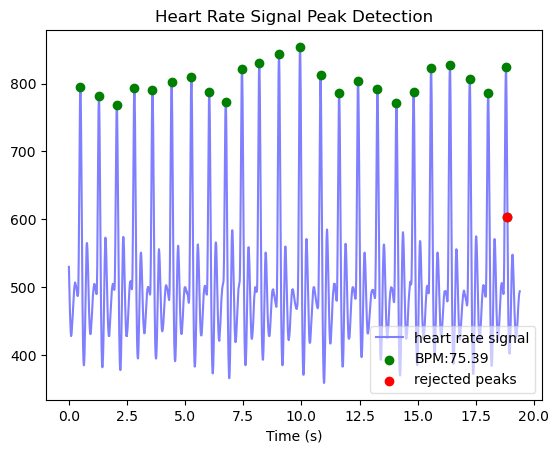

In [2]:
hp.plotter(working_data, measures)

In [12]:
import numpy as np
import pandas as pd

# Load your HRV time series data (assuming it's a CSV file with column "hrv" containing HRV values)
hrv_data = pd.read_csv(r'file_resource/rr-interval-time-series-modeling-the-physionet-computing-in-cardiology-challenge-2002-1.0.0/dataset/rr01')

# Convert HRV time series to R-R intervals
def hrv_to_rr(hrv_series):
    rr_intervals = 60000 / hrv_series
    return rr_intervals

def bpm_to_rr(bpm_series):
    bpm_series = (1/bpm_series)*60
    return bpm_series
# rr_intervals = hrv_to_rr(hrv_data)
bpm_series = bpm_to_rr(hrv_data)
print(bpm_series)

            0.703
0       84.388186
1       82.530949
2       87.209302
3       88.235294
4       87.209302
...           ...
107779  80.862534
107780  79.155673
107781  77.619664
107782  77.619664
107783  80.862534

[107784 rows x 1 columns]


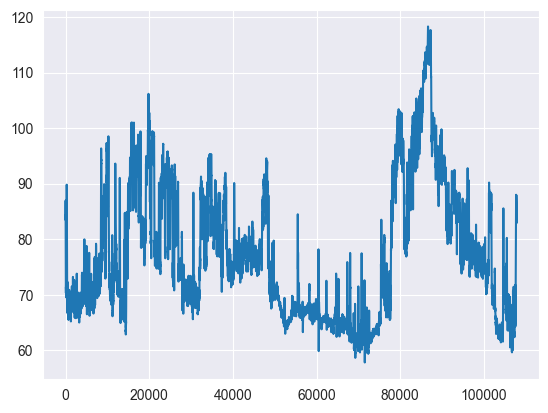

In [21]:
import matplotlib.pyplot as plt

res = bpm_series.rolling(60,min_periods=1).mean()
plt.plot(res)

In [5]:
from file_resource.mmash_master.function_code import open_data, circadian, HRV_analysis
import os
path = 'file_resource/multilevel-monitoring-of-activity-and-sleep-in-healthy-people-1.0.0/DataPaper' # Select the path where the data are allocated
users = os.listdir(path)[:-1] # Cerate a list of users' name

D:\ProgramData\Anaconda3\envs\TensorFlow_work\lib\site-packages\scipy\optimize\_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


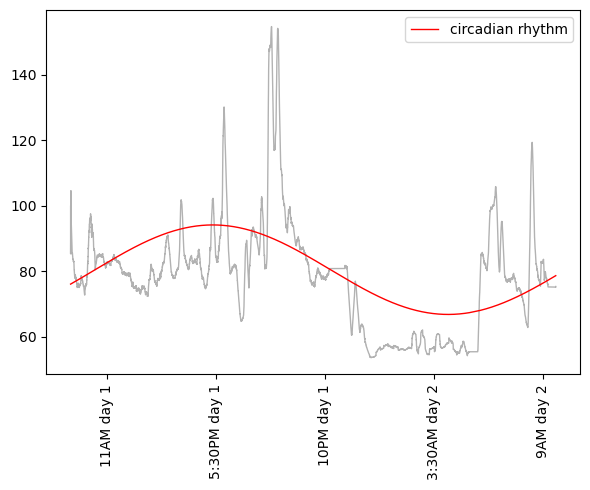

83576


In [25]:
df_rr = open_data.create_dataset(users,'RR',path).reset_index() # Import dataset with RR intervals data
# Transform Time format in seconds. 0 refers to 12 AM, while positive and negative values refers to pre and post midnight, respectively.
import datetime
df_rr['timestamp'] = [float(x.split(':')[0])*60*60 + float(x.split(':')[1])*60 + float(x.split(':')[2]) if y==1 else
                        float(x.split(':')[0])*60*60 + float(x.split(':')[1])*60 + float(x.split(':')[2]) + 24*60*60
                        for x,y in zip(df_rr['time'],df_rr['day'])]
df_rr['datetime'] = [datetime.datetime(year=2000,month=1,day=2 if y == -29 else y,hour=int(x.split(":")[0]),minute=int(x.split(":")[1]),second=int(x.split(":")[2])).__str__()
                        for x,y in zip(df_rr['time'],df_rr['day'])]

# Fiter ectopic beats
df_rr['ibi_s'] = [x if x<2 else np.nan for x in df_rr['ibi_s']]
df_rr['ibi_s'] = [x if x>0.3 else np.nan for x in df_rr['ibi_s']]
# df_rr = df_rr.dropna()

# Compute Heart Rate values from ibi
df_rr['hr'] = [60/x for x in df_rr['ibi_s']]
df_user_example = df_rr[df_rr['user']=='user_3'].dropna()
res_single = circadian.fit_sin(df_user_example['timestamp'],df_user_example['hr'].rolling(600,min_periods=1).mean(),plot=True) # fit single component cosinor curves
print(len(df_user_example['hr']))

df_user_timestamp= res_single["tt"]
res_data = res_single["yy"]
data = pd.DataFrame({"data":df_user_example['hr'].rolling(600,min_periods=1).mean(),"timestamp":df_user_example['datetime']})

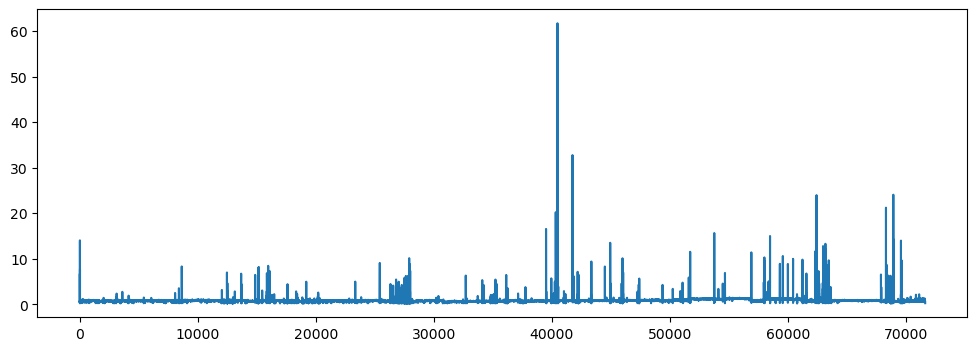

bpm: 169.048928
ibi: 354.926829
sdnn: 165.300080
sdsd: 109.608469
rmssd: 216.990993
pnn20: 0.909091
pnn50: 0.818182
hr_mad: 144.000000
sd1: 133.665921
sd2: 125.021122
s: 52499.354251
sd1/sd2: 1.069147
breathingrate: 0.137438


D:\ProgramData\Anaconda3\envs\TensorFlow_work\lib\site-packages\heartpy\visualizeutils.py:119: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<Figure size 1200x400 with 0 Axes>

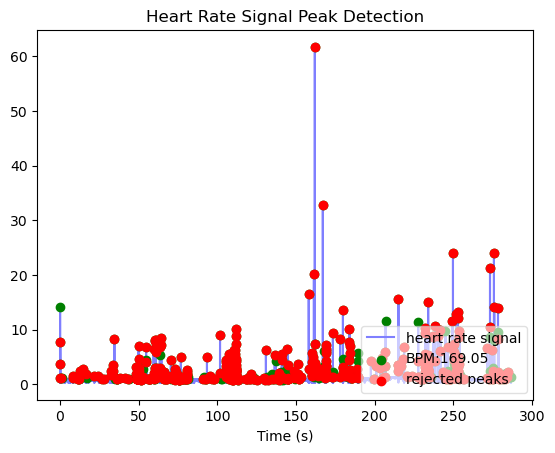

In [24]:
data = hp.get_data(r'D:\OneDrive\OneDrive - Aston University\aston\Research\file_resource\multilevel-monitoring-of-activity-and-sleep-in-healthy-people-1.0.0\DataPaper\user_2\rrexp.csv',encoding='utf-8')

plt.figure(figsize=(12,4))
plt.plot(data)
plt.show()
#run analysis
sample_rate = 250
wd, m = hp.process(data, sample_rate)

#visualise in plot of custom size
plt.figure(figsize=(12,4))
hp.plotter(wd, m)

#display computed measures
for measure in m.keys():
    print('%s: %f' %(measure, m[measure]))